## Nodes and Affiliations
In the game **Six Degrees of Kevin Bacon**, the goal is to find a link between a given actor and the actor Kevin Bacon. In one version of the network, nodes represent actors and edges represent movies that two actors both appeared in. This version of the network(let's call it actor-actor network) is sufficient for finding Kevin Bacon, but it does not fully represent the relationships between actors and movies. Movies typically have a cast of many actors, but eache dge in the actor-actor network only corresponds to two actors. Consequently, there need to be many edges fpor each movie.
On the other hand, if a movie had only a single actor, there would be no corresponding edges and it wouldn't appear in the actor-actor network at all. It would be much more convenient if tgere was also a node for each movie. In this modified network (let's call it the actor-movie network), there are 2 types of nodes, movies and actors, and each edge connects one movie to one actor in that movie. Such networks are called affiliation networks because the edges often represent affiliations between people(like actors) and groups of people(like a movie cast)

Formally, an affiliation network(bipartite network) is one that has 2 types of nodes and only allows edges from one type of node to other. This is in contrast to standard *single-mode* networks, which have only one tyoe of node. The tw types of node are sometimes called top and bottom or left and right


Affiliation networks are useful for representing many-to-many relationships. For example, a movie can contain many actors, and an actor can appear in many movies; or a postal code can cover many cities

## Affiliation Networks in NetworkX
They are represented in NetworkX using the same classes as other networks: Graph and DiGraph. The only difference is that you need to keep track of whicjh nodes are of which type. 

In [3]:
from networkx.algorithms import bipartite
from networkx import NetworkXError
import networkx as nx

# load zachary karate network
G = nx.karate_club_graph()


def check_bipartite(G):
    try:
        # find and print node sets
        left, right = bipartite.sets(G)
        print("Left nodes\n", left)
        print("\nRight nodes\n", right)
    except NetworkXError as e:
        # not an affiliation network
        print(e)

check_bipartite(G)

Graph is not bipartite.


The karate club network is not an affiliation network. There is no reason it should be - anyone can be friends with anyone else. However, for the sake of demonstrating a point, we will turn it into an affiliation network. Friends can be affiliated with each other by their friendships, so the friendships - or edges - can be used as the 2nd type of node.

In [4]:
B = nx.Graph()
B.add_edges_from([(v, (v,w)) for v, w in G.edges])
B.add_edges_from([(w, (v,w)) for v, w in G.edges])

check_bipartite(B)

Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


In [6]:
from pathlib import Path
data_dir = Path("../data/bartomeus2008/Bartomeus_Ntw_nceas.txt")



B = nx.Graph()
with open(data_dir) as f:
    # skip header row
    next(f)
    for row in f:
        # break row in cells
        cells = row.strip().split("\t")
        # get plant species and pollinator species
        plant = cells[4].replace("_", "\n")
        pollinator = cells[8].replace("_", "\n")
        B.add_edge(pollinator, plant)

        # set node types
        B.nodes[pollinator]["bipartite"] = 0
        B.nodes[plant]["bipartite"] = 1

# only consider connected species
B = B.subgraph(list(nx.connected_components(B))[0])

We could use sets() to find the node sets again, but there's an easier way. When the preceding Graph was built, a bipartite attribute was created to track which node set each node belongs to: 0 for pollinators and 1 for plants.

{'Oedemera\nflavipes': Text(0.2492892890797732, 0.22801975550026538, 'Oedemera\nflavipes'),
 'Urospermum\npicrioides': Text(0.04697521007209607, -0.12900691445699014, 'Urospermum\npicrioides'),
 'Anthidium\nsticticum': Text(-0.09766738265570946, -0.3781755696534315, 'Anthidium\nsticticum'),
 'Sonchus\ntenerrinus': Text(0.07090977326310405, -0.0010997780858658995, 'Sonchus\ntenerrinus'),
 'Oedemera\nlurida': Text(0.09231428394885265, 0.268523236749369, 'Oedemera\nlurida'),
 'Lavandula\nstoechas': Text(0.20698394508966952, -0.09637073323477312, 'Lavandula\nstoechas'),
 'Psilothrix': Text(0.2067693965174553, 0.3677498124388734, 'Psilothrix'),
 'Aetheorrina\nbulbosa': Text(0.42837498829816006, 0.11638955357323377, 'Aetheorrina\nbulbosa'),
 'Criptocephalus': Text(0.7196678969836284, -0.22723731588459042, 'Criptocephalus'),
 'Megaquile': Text(-0.7549914554862837, 0.008932427087303919, 'Megaquile'),
 'Amegilla\nfemorata?': Text(0.33381007440030014, -0.8379155314319496, 'Amegilla\nfemorata?'),

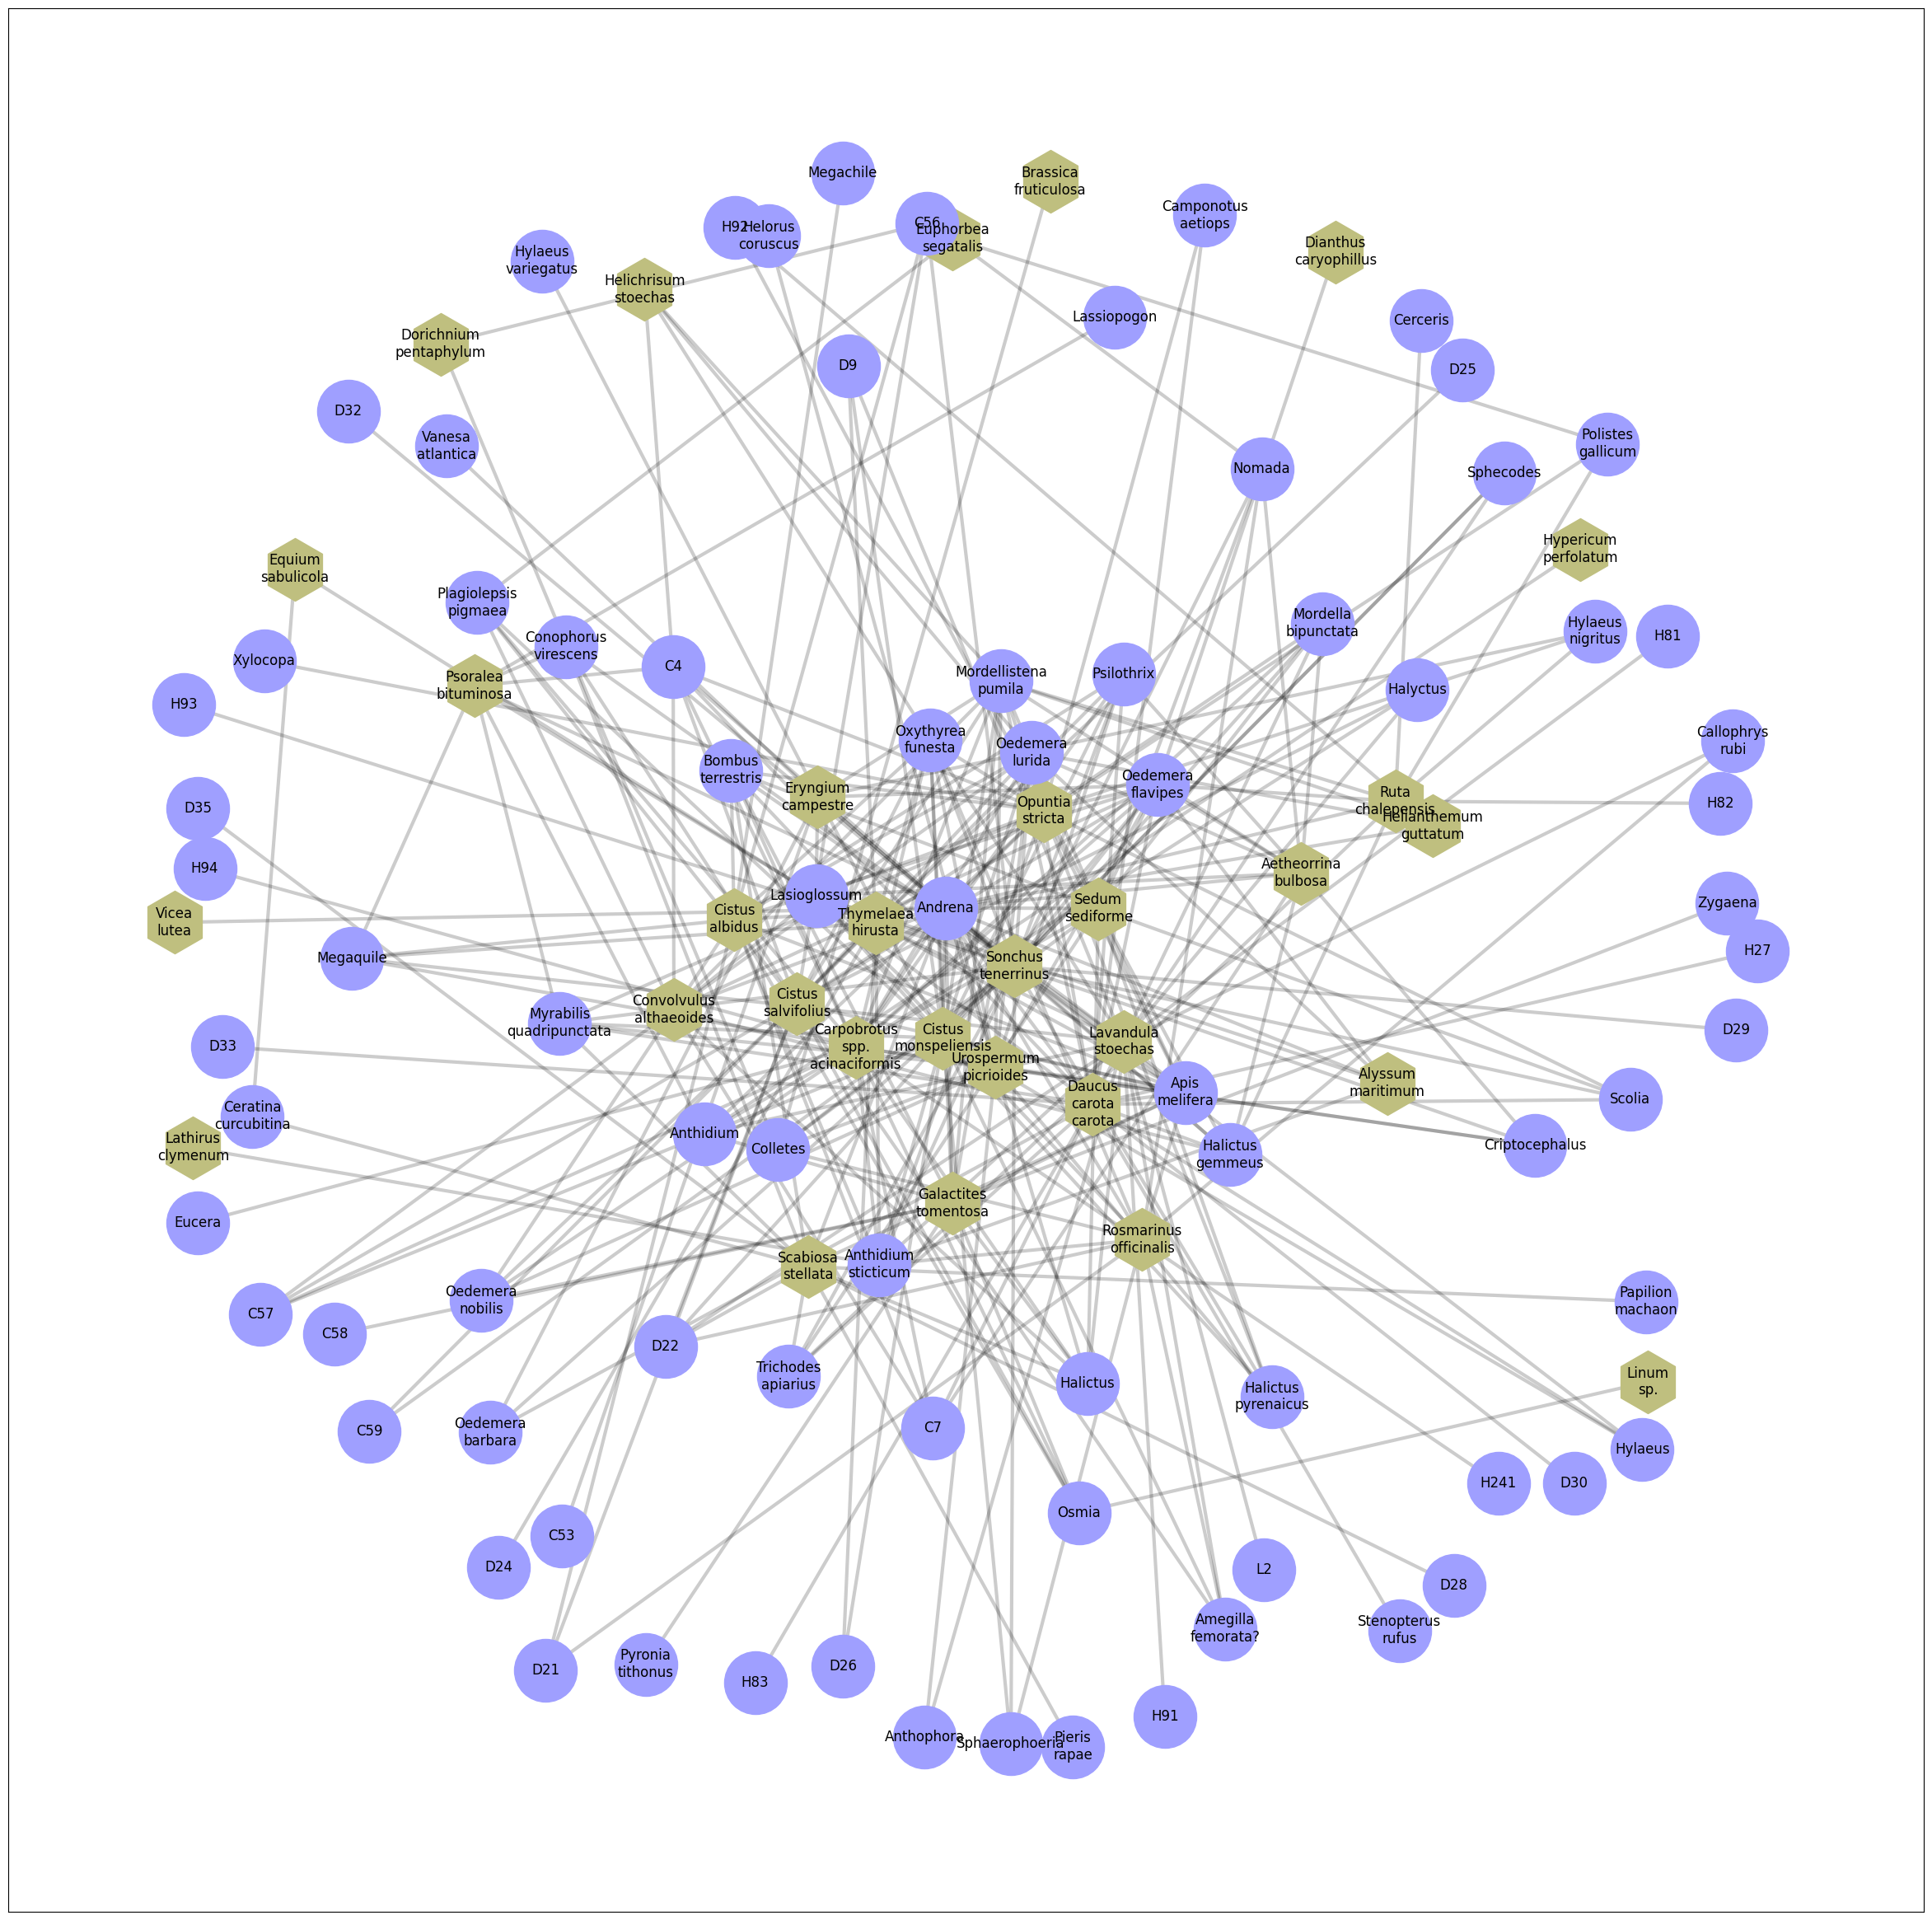

In [8]:
# get node sets
pollinators = [v for v in B.nodes if B.nodes[v]['bipartite'] == 0]
plants = [v for v in B.nodes if B.nodes[v]['bipartite'] == 1]

import matplotlib.pyplot as plt
%matplotlib inline 


plt.figure(figsize=(30,30))
pos = nx.spring_layout(B, k=0.9)

# Draw using different shapes and colors for plants and pollinators
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#bfbf7f", node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#9f9fff",node_size=3000)
nx.draw_networkx_labels(B, pos)


# Projections
While affiliation networks are useful for representing the full structure of many-to-many relationships, it is sometimes easier to work with standard single-mode networks. This might be the case if an analysis focuses on a particular type of node, or if a necessary technique is only available for single-mode networks, or if the affiliation network has too many nodes to visualize clearly. 

Single-mode networks built from affiliation networks are called **Co-affiliation** networks, because the nodes are connected by an edge if they have common affiliations. There are several types of projections that are used to create co-affiliation networks, but they all revolve around the same idea: connecting nodes with a common neighbor in the original affiliation network. 
The simplest possible projection is an unweighted projection, which creates an unweighted edge between nodes with one or more common neighbors

{'Urospermum\npicrioides': Text(0.25389477550969364, -0.2457055981892633, 'Urospermum\npicrioides'),
 'Sonchus\ntenerrinus': Text(0.2668878874913749, -0.10663143292728794, 'Sonchus\ntenerrinus'),
 'Lavandula\nstoechas': Text(-0.21336718552079229, 0.24554183922983003, 'Lavandula\nstoechas'),
 'Aetheorrina\nbulbosa': Text(0.1276657212027382, -0.26931314039606435, 'Aetheorrina\nbulbosa'),
 'Euphorbea\nsegatalis': Text(0.44820589444890624, 0.29504695283920385, 'Euphorbea\nsegatalis'),
 'Convolvulus\nalthaeoides': Text(0.003378169321556473, -0.22668855445377642, 'Convolvulus\nalthaeoides'),
 'Carpobrotus\nspp.\nacinaciformis': Text(-0.3295419748176789, -0.035762750729491796, 'Carpobrotus\nspp.\nacinaciformis'),
 'Equium\nsabulicola': Text(0.4842472560541648, 0.1009526746691573, 'Equium\nsabulicola'),
 'Daucus\ncarota\ncarota': Text(0.25300436718564523, 0.010528082928135587, 'Daucus\ncarota\ncarota'),
 'Eryngium\ncampestre': Text(-0.0630435270757638, -0.3324409078210501, 'Eryngium\ncampestre

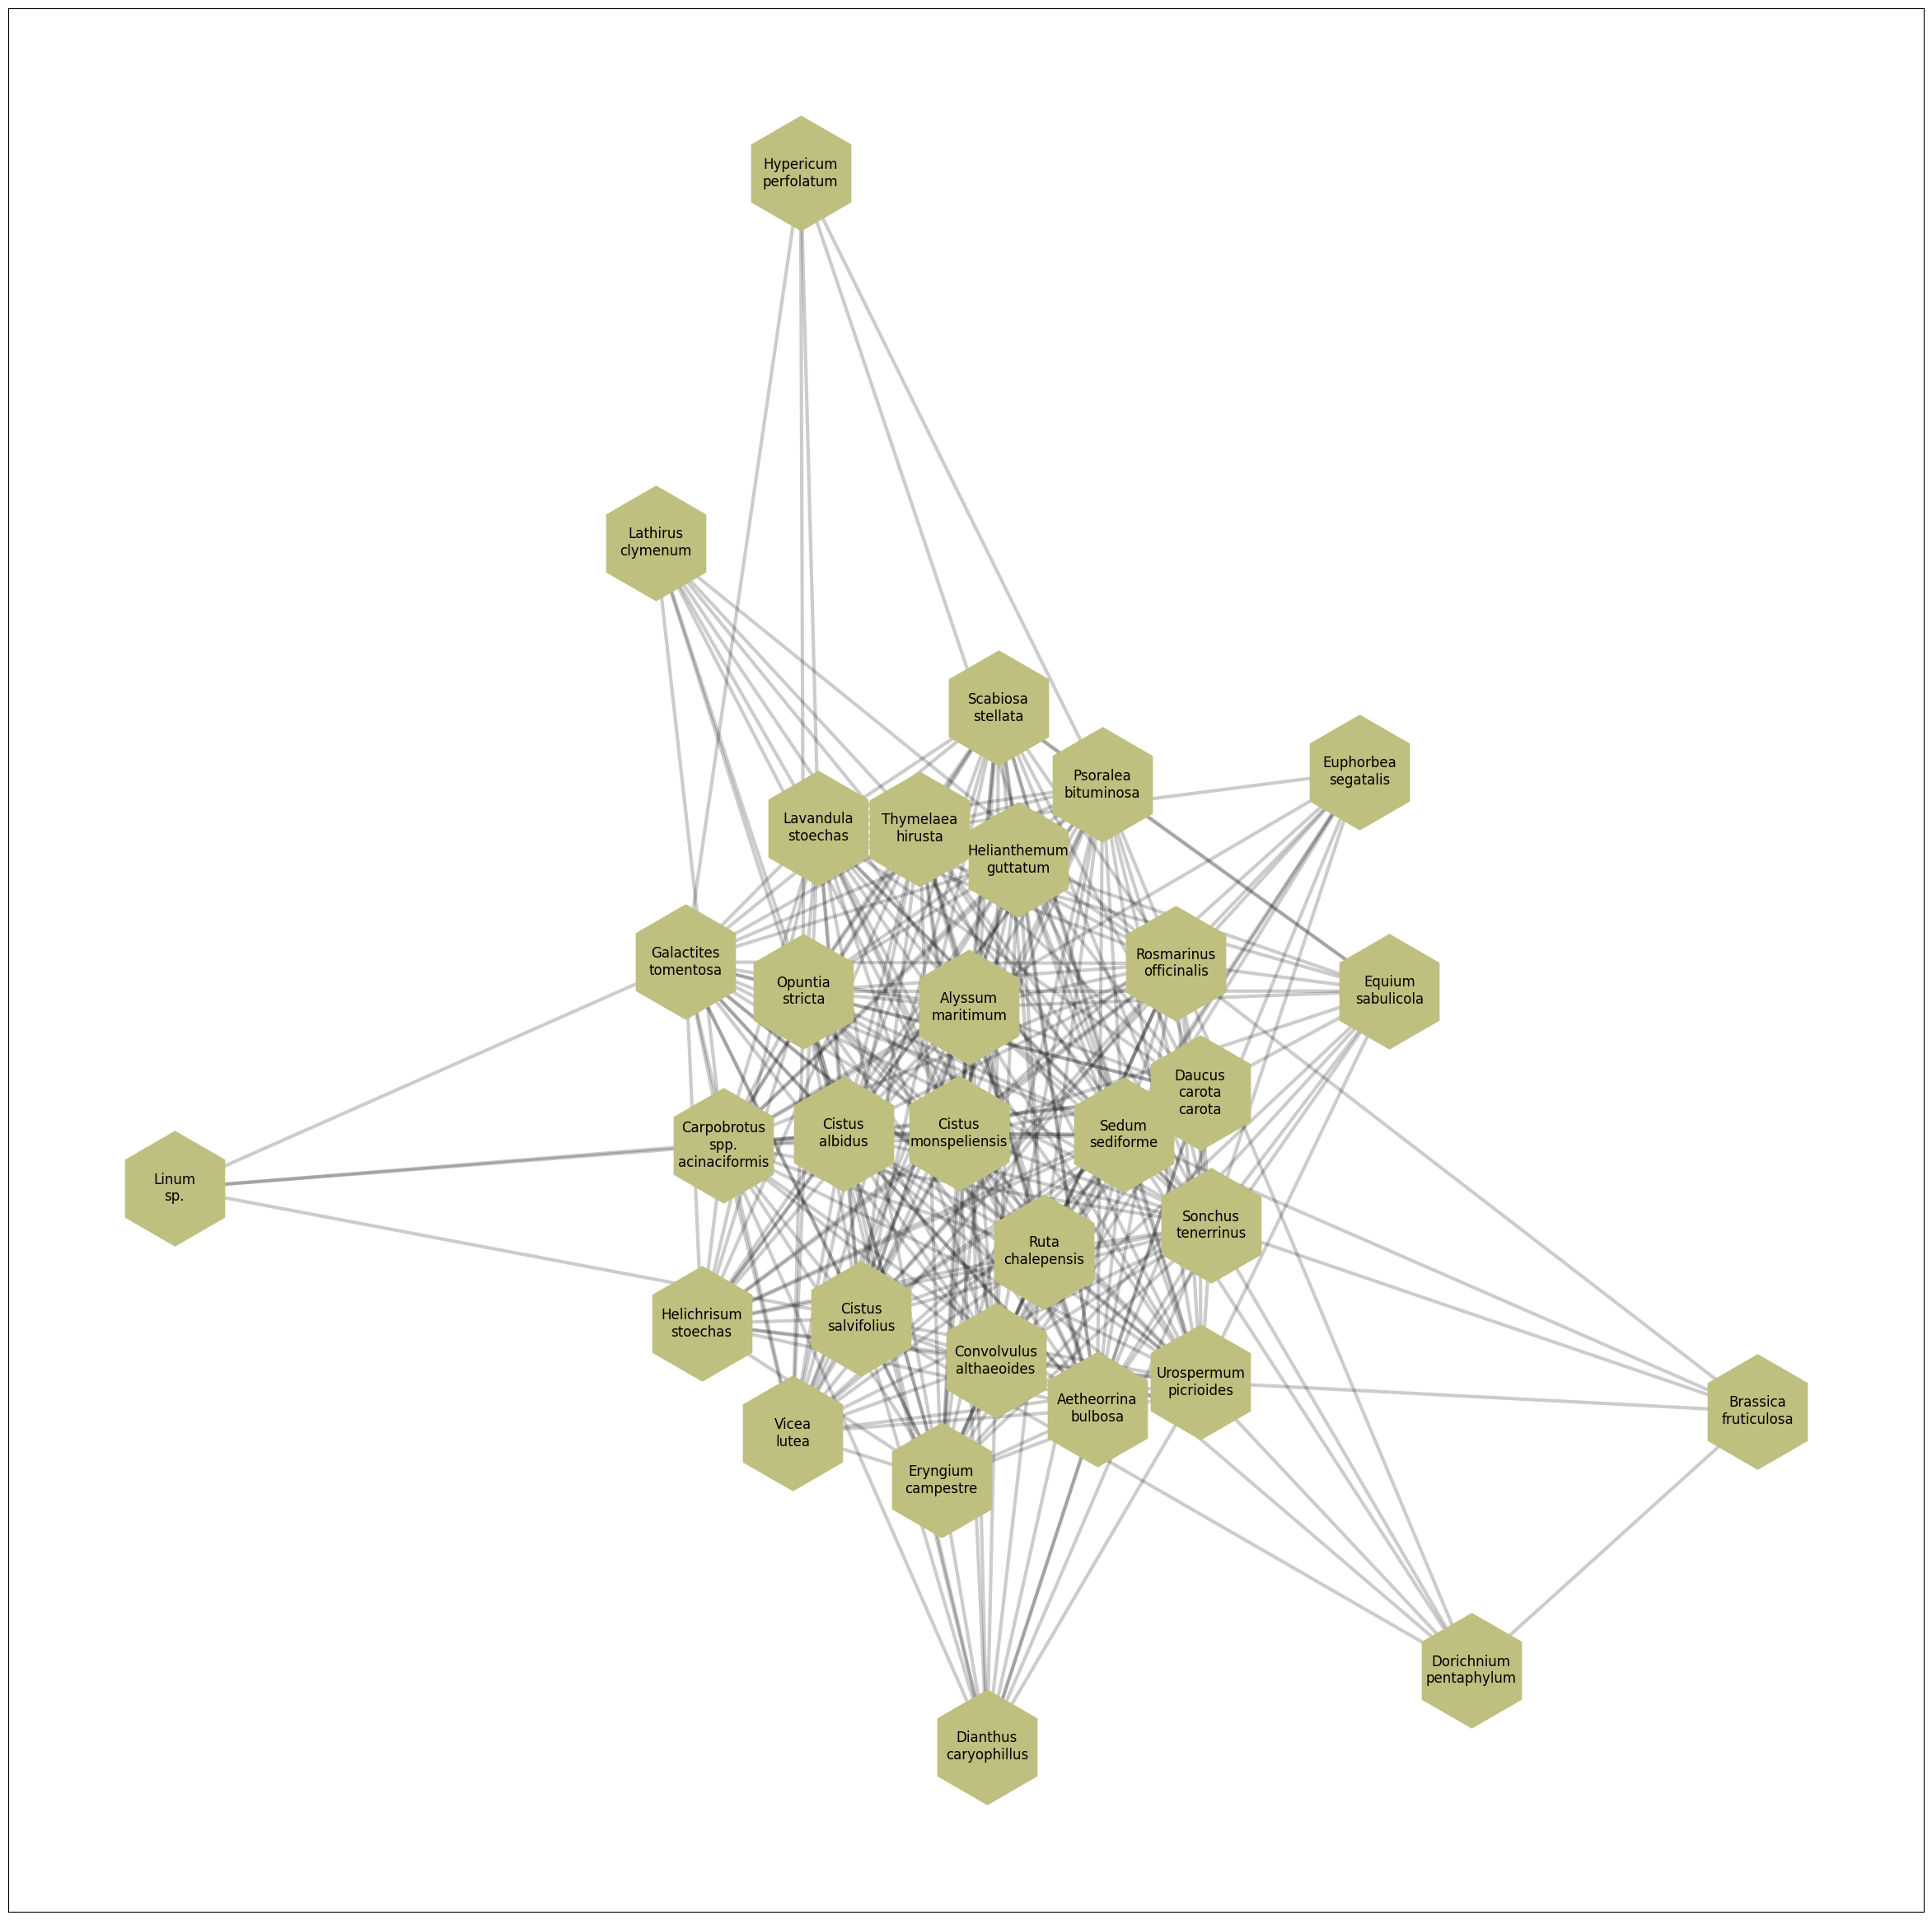

In [13]:
# create co-affiliation networks
G = bipartite.projected_graph(B, plants)
# create figure
plt.figure(figsize=(30,30))

# plot
pos = nx.spring_layout(G, k=0.5)

# draw the dges, nodes and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#bfbf7f", node_shape="h", node_size=10000)
nx.draw_networkx_labels(G, pos)

The core of the network is densely connected. This occurs because each neighbor of a pollinator becomes connected to all of that pollinator's other neighbors, creating a group of plants that are all connected to each other, a structure known as a clique. This highly connceytdd core is a characteristic of co-affiliation networks.
It is also possible to project the pollinator network onto the pollinators instead of the plants

{'Oedemera\nflavipes': Text(-0.15143414938000754, 0.11949350966343142, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(-0.028900260241454808, -0.10911088310016477, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(-0.1966771132457442, -0.14673486257120288, 'Oedemera\nlurida'),
 'Psilothrix': Text(-0.24130971994441208, -0.06361172039251135, 'Psilothrix'),
 'Criptocephalus': Text(-0.3131486202210818, -0.034932341006282217, 'Criptocephalus'),
 'Megaquile': Text(0.0666108189855153, -0.3376944181584564, 'Megaquile'),
 'Amegilla\nfemorata?': Text(0.189579721126207, -0.36220045036238974, 'Amegilla\nfemorata?'),
 'Andrena': Text(0.055678734899770606, 0.03126036590929906, 'Andrena'),
 'Apis\nmelifera': Text(0.031598893094493964, -0.0518428981231943, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(0.2018209194882866, 0.4671113250628468, 'Polistes\ngallicum'),
 'L2': Text(0.6407231978691832, -0.3765813193784879, 'L2'),
 'C7': Text(-0.4915720867753185, -0.13304668999711364, 'C7'),
 'Lasioglos

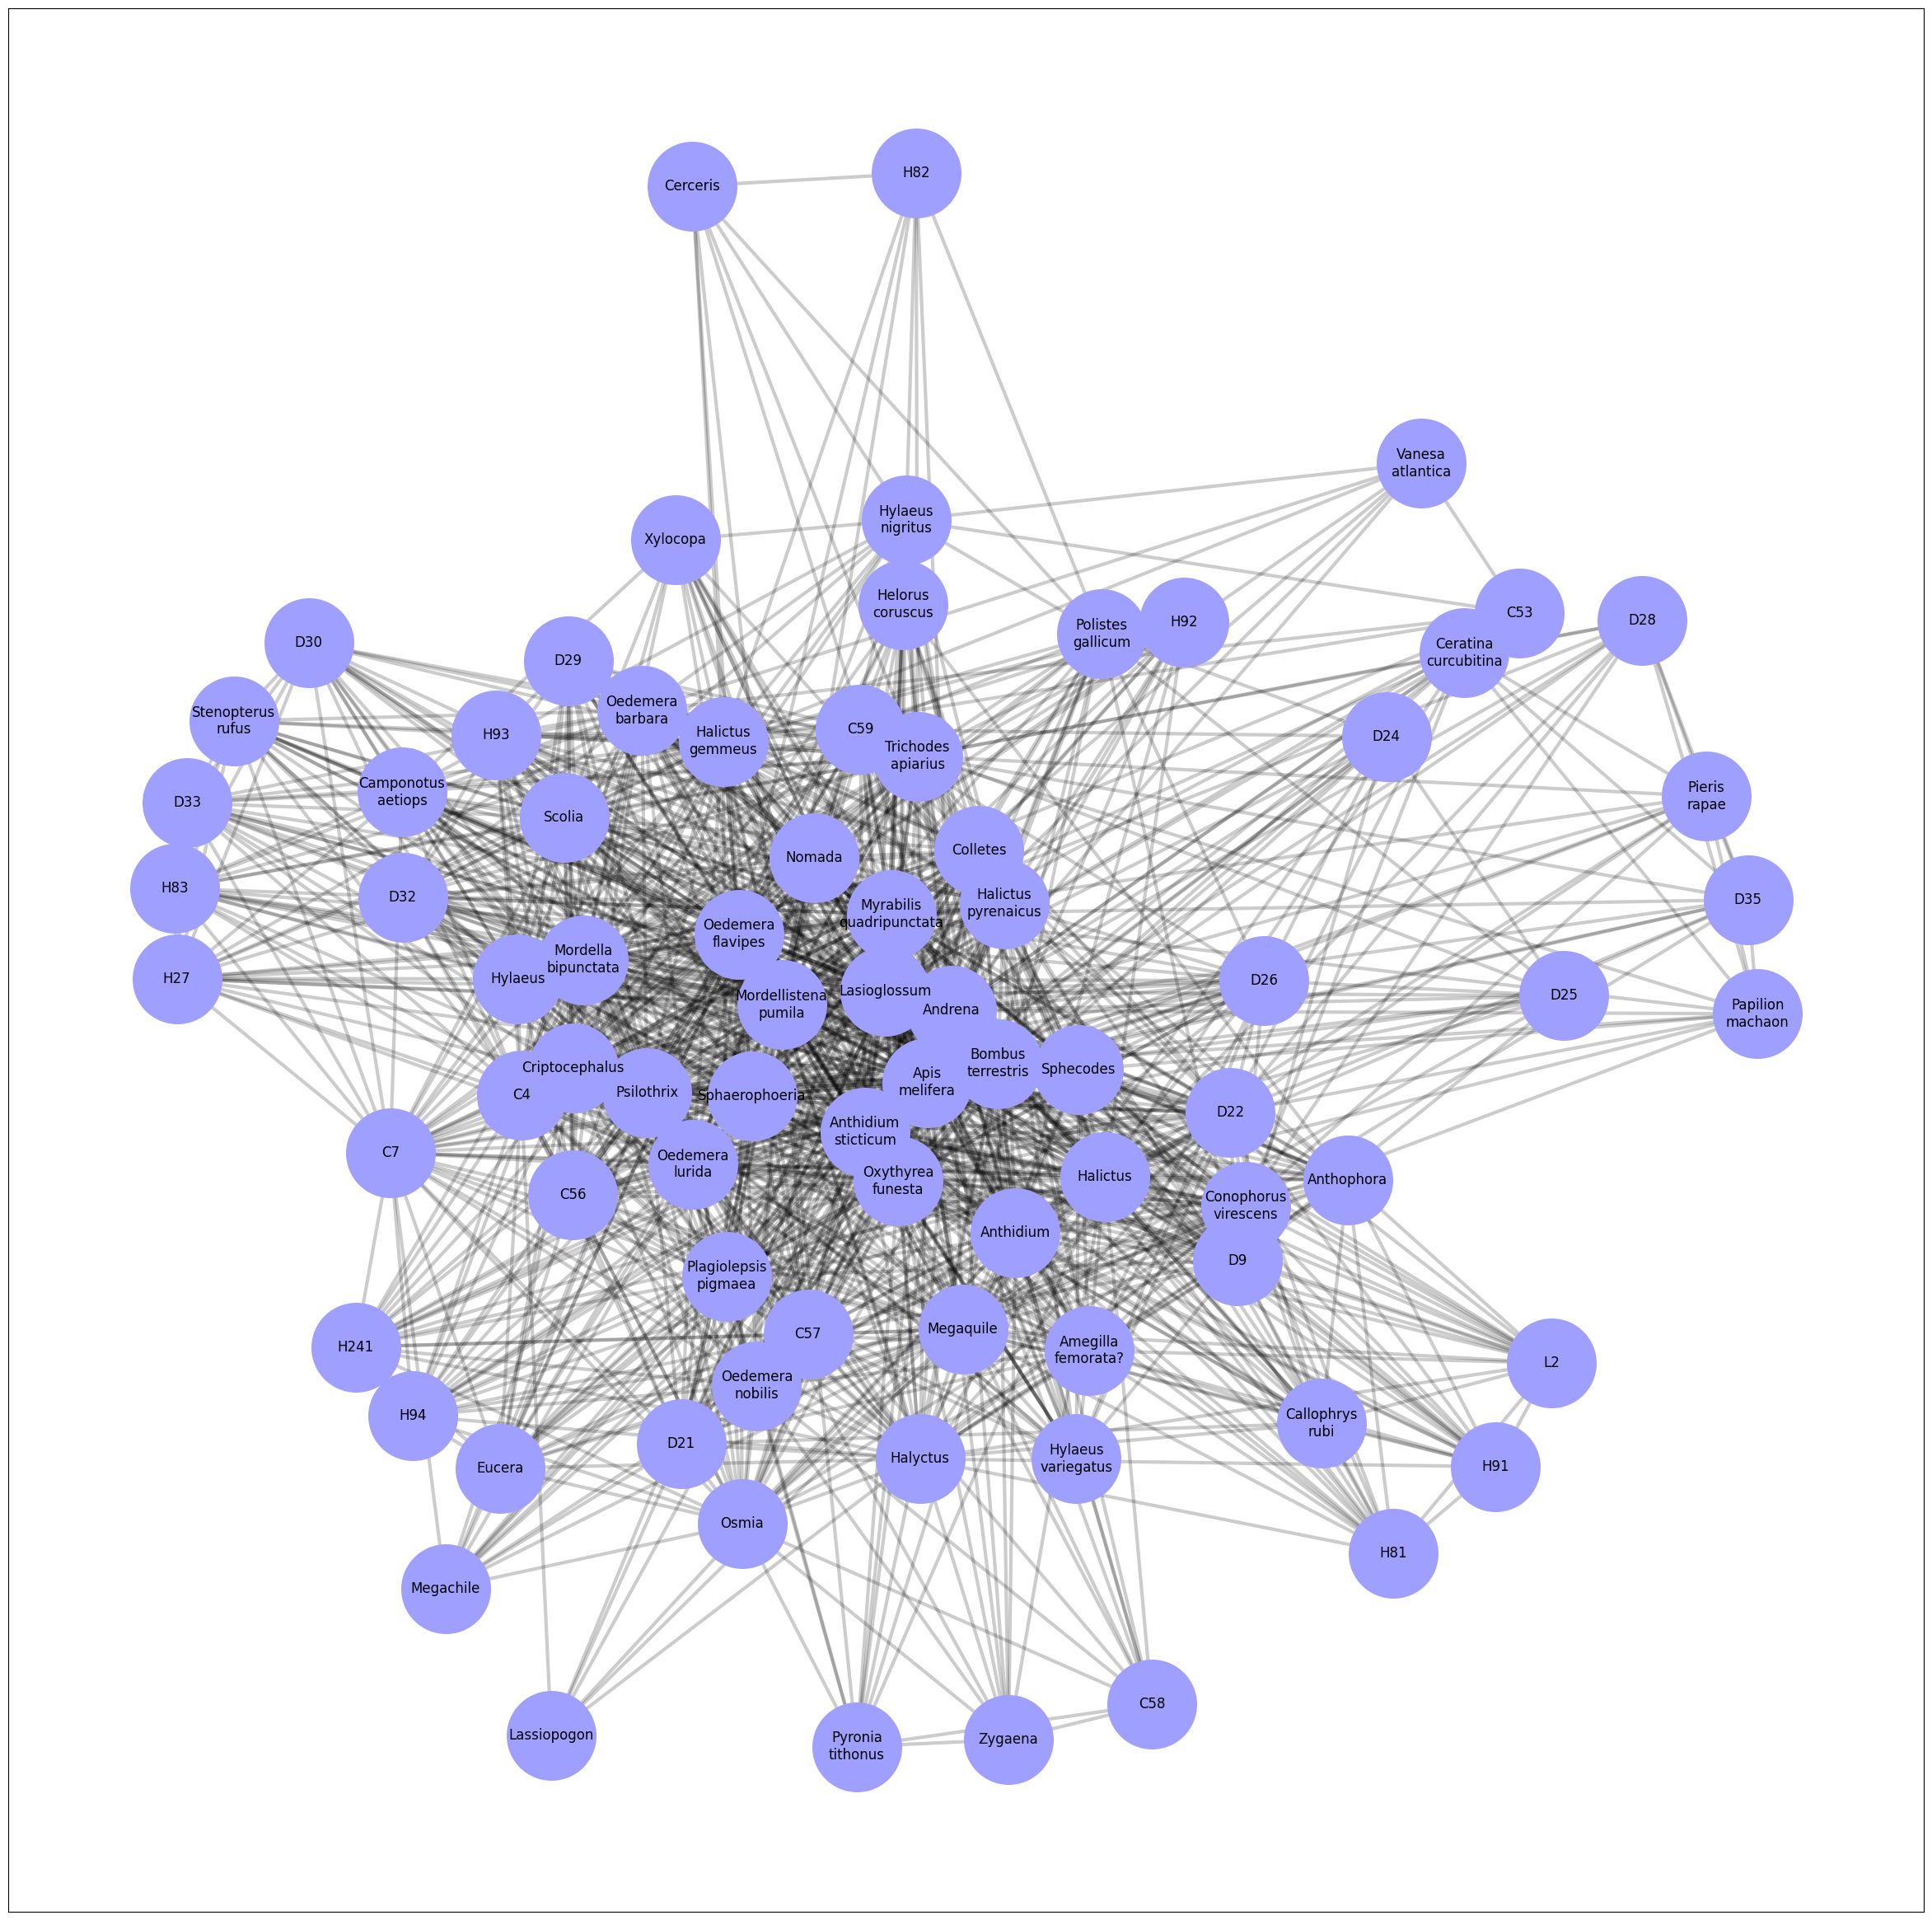

In [14]:
# create co-affiliation networks
G = bipartite.projected_graph(B, pollinators)
# create figure
plt.figure(figsize=(30,30))

# plot
pos = nx.spring_layout(G, k=0.5)

# draw the dges, nodes and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff",  node_size=6000)
nx.draw_networkx_labels(G, pos)

In the preceding unweighted projections, considerable information is lost concerning the structure of the affiliation network. An edge might mean that 2 nodes have one common affiiation or one hundred. One way to capture this is to use a weighted projection. One common way to calculate edge weights is by simply counting the number of common neighbors. 

In [15]:
G = bipartite.weighted_projected_graph(B, plants)
list(G.edges(data=True))[0]

('Urospermum\npicrioides', 'Lavandula\nstoechas', {'weight': 5})

The *overlap_weighted_projection_graph()* function creates a projection using the Jaccard index. The jaccard index for 2 nodes is the number of common neighbors divided by the number of nodes that  neighbor either nodes, and ranges from 0(no common neighbors) to 1(all neighbors are common)

/tmp/ipykernel_221265/2401662414.py:14: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=6, alpha=0.5, edge_color=weight, edge_cmap=plt.cm.Blues)


{'Oedemera\nflavipes': Text(0.02448196419931005, -0.1518243222228094, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(-0.23369532913872212, -0.02826230475284315, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(-0.14960334392554905, -0.14209478529361938, 'Oedemera\nlurida'),
 'Psilothrix': Text(-0.17636793490300146, -0.25593903866901263, 'Psilothrix'),
 'Criptocephalus': Text(-0.22907607312749909, -0.36844064645108643, 'Criptocephalus'),
 'Megaquile': Text(-0.2845240540880204, 0.05214272096263473, 'Megaquile'),
 'Amegilla\nfemorata?': Text(-0.3259744418920741, 0.4411594928745612, 'Amegilla\nfemorata?'),
 'Andrena': Text(0.06134905392298656, 0.05807251682253517, 'Andrena'),
 'Apis\nmelifera': Text(-0.03883326349091677, 0.010845406510832337, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(-0.26932155663726626, 0.42577285684122934, 'Polistes\ngallicum'),
 'L2': Text(-0.21526219725513823, 0.7923262567481634, 'L2'),
 'C7': Text(-0.19270264828129224, -0.4970604558283738, 'C7'),
 'Lasio

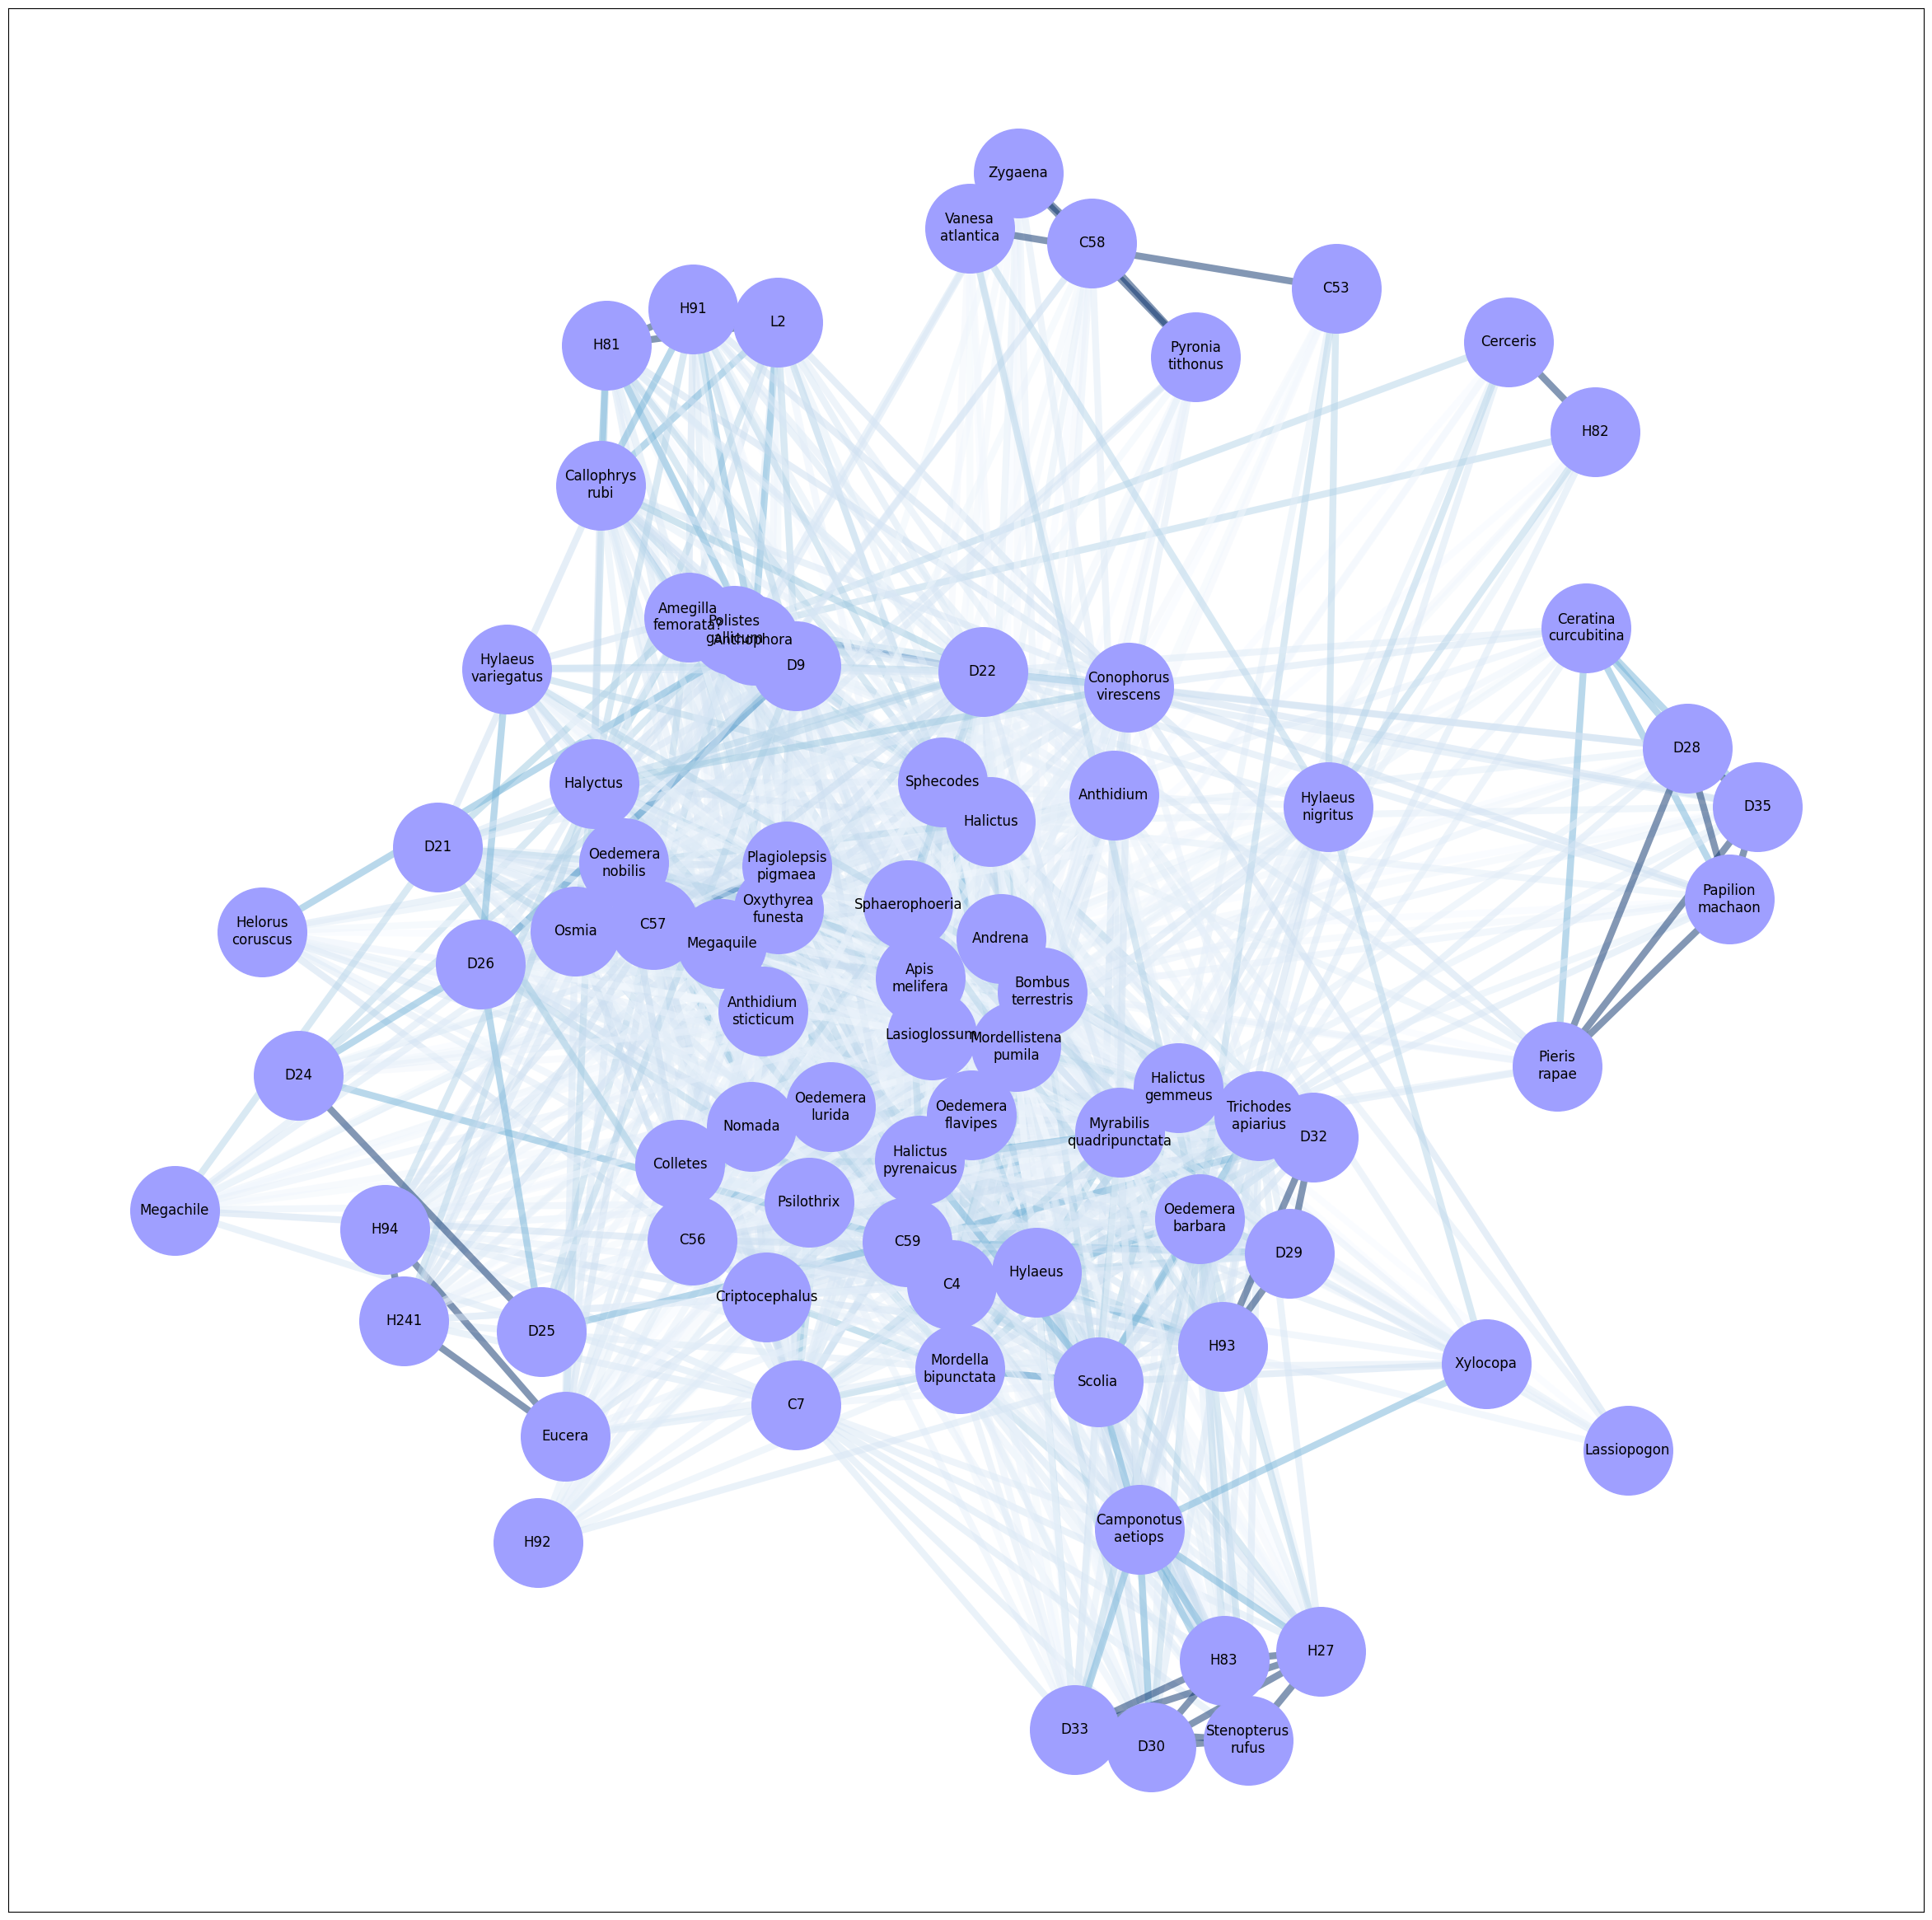

In [16]:
# create co-affiliation network
G = bipartite.overlap_weighted_projected_graph(B, pollinators)

# get weights
weight = [G.edges[e]['weight'] for e in G.edges]

plt.figure(figsize=(30,30))

# layout
pos = nx.spring_layout(G, weight="weight", k=0.5)


# draw the dges, nodes and labels
nx.draw_networkx_edges(G, pos, width=6, alpha=0.5, edge_color=weight, edge_cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)


While most nodes have many neighbors, the weight of those edges are relatively low. However, some nodes have fewer but stronger connections, showing isolated groups of pollinators that have much in common with each other.